# 1.4a Introduction to TensorFlow

#### Use TensorFlow to fit a line of the form y=m*x+b

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#### Create a very small data set

In [2]:
# xs = [0, 1, 2, 3, 4, 5, 6, 7]
# ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.]

xs = np.linspace(0., 8., 8000000)
ys = -0.8 + 0.3*xs + np.random.normal(scale=0.25, size=len(xs))

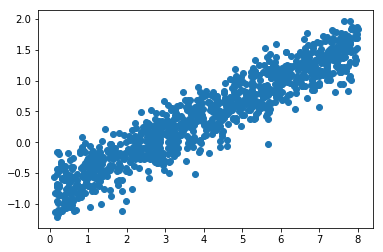

In [3]:
fig, ax = plt.subplots()
# ax.scatter(xs, ys)

data_subset = pd.DataFrame(list(zip(xs, ys)), columns=['x', 'y']).sample(n=1000, replace=True)
ax.scatter(data_subset.x, data_subset.y)

In [4]:
m_initial = -0.5
b_initial = 1.0

In [5]:
m = tf.Variable(m_initial)
b = tf.Variable(b_initial)

In [6]:
_BATCH = 8
xs_placeholder = tf.placeholder(tf.float32, [_BATCH])
ys_placeholder = tf.placeholder(tf.float32, [_BATCH])

In [7]:
# total_error = 0.0
# for x,y in zip(xs, ys):
#     y_model = m*x + b
#     total_error += (y-y_model)**2

ys_model = m*xs_placeholder+b
total_error = tf.reduce_sum((ys_placeholder-ys_model)**2)

In [8]:
optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error)

In [9]:
initializer_operation = tf.global_variables_initializer()

In [21]:
with tf.Session() as session:
    
    session.run(initializer_operation)
    
    _EPOCHS = 10000
    for iteration in range(_EPOCHS):
        random_indices = np.random.randint(len(xs), size=_BATCH)
        
        feed = {
            xs_placeholder: xs[random_indices],
            ys_placeholder: ys[random_indices]
        }
        
        session.run(optimizer_operation, feed_dict=feed)
        
    slope, intercept = session.run((m, b))
    print('Slope:', slope, 'Intercept:', intercept)

Slope: 0.308847 Intercept: -0.795755


(-0.40985663082437274, 8.4098566308243718)

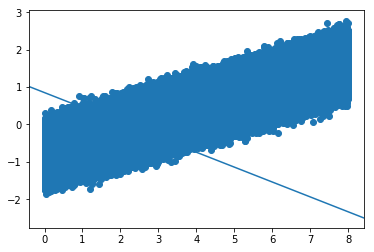

In [11]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)

x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max])
ax.set_xlim([x_min, x_max])